<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/Stock_Market_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Stock Market Analysis

**Objective:** Analyze historical stock and crypto prices to uncover trends, calculate technical indicators, and derive actionable insights for investment decisions.

# **Step 1: Data Preprocessing**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/portfolio_data.csv")

# 1. Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Set 'Date' as the index for time-series analysis
df.set_index('Date', inplace=True)

# 3. Check for missing values
print("Missing values before interpolation:\n")
print(df.isnull().sum())

# 4. Handle missing values using linear interpolation
df.interpolate(method='linear', inplace=True)

# 5. Verify missing values are handled
print("\nMissing values after interpolation:\n")
print(df.isnull().sum())

# 6. Preview the cleaned dataset
df.head()

Missing values before interpolation:

AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

Missing values after interpolation:

AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


# **Step 2: Exploratory Data Analysis (EDA)**

**📍 1. Line Plot of All Assets**

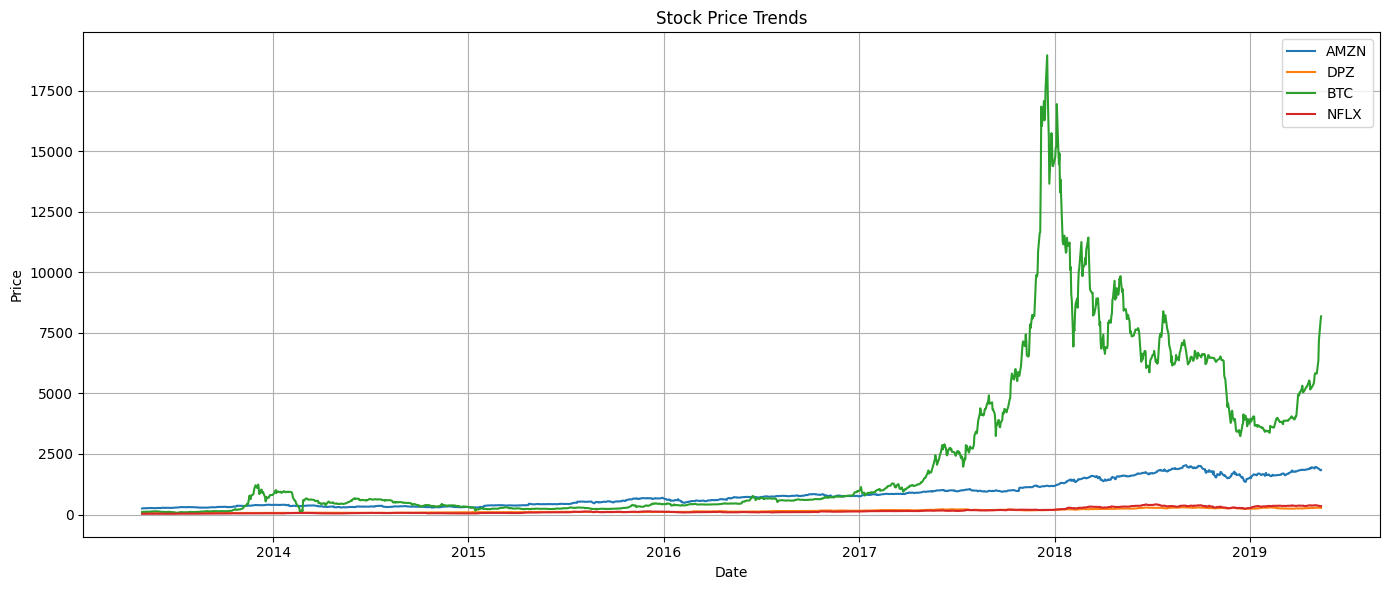

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

* ***AMZN (Amazon)*** and ***DPZ (Domino's Pizza)*** show steady and consistent growth over time, reflecting gradual investor confidence and stable performance.

* ***NFLX (Netflix)*** also trends upward with some fluctuations, indicating periods of strong growth interspersed with corrections.

* ***BTC (Bitcoin)*** exhibits extreme volatility and rapid growth, especially between 2017 and early 2018, followed by a sharp decline. This highlights the speculative nature of cryptocurrencies compared to traditional stocks.

**📍 2. Moving Averages for Amazon (AMZN)**

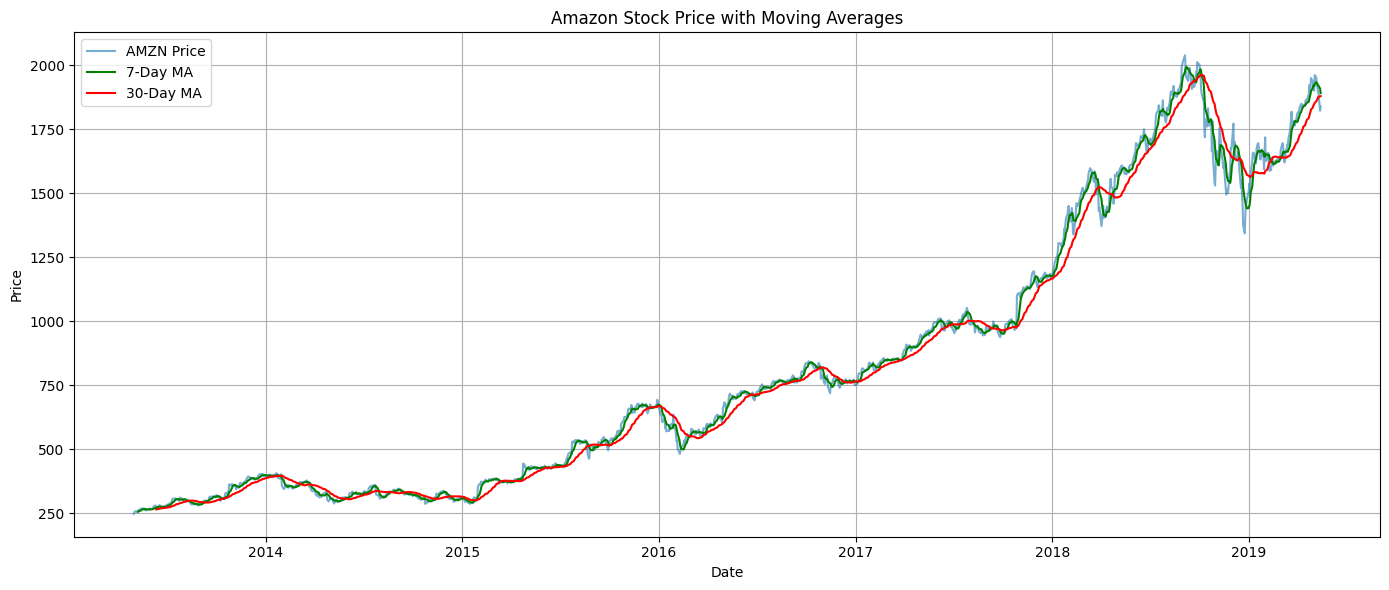

In [3]:
# Calculate 7-day and 30-day moving averages for AMZN
df['AMZN_MA7'] = df['AMZN'].rolling(window=7).mean()
df['AMZN_MA30'] = df['AMZN'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['AMZN'], label='AMZN Price', alpha=0.6)
plt.plot(df.index, df['AMZN_MA7'], label='7-Day MA', color='green')
plt.plot(df.index, df['AMZN_MA30'], label='30-Day MA', color='red')
plt.title("Amazon Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

* The ***blue line*** represents AMZN’s actual stock price, while the ***green (7-day)*** and ***red (30-day)*** lines are short- and long-term moving averages.

* Throughout the period, ***both moving averages trend upward***, indicating long-term bullish momentum.

* **Crossovers:**

  * When the ***7-day MA (green)*** crosses ***above*** the 30-day MA (red), it often signals a ***buy opportunity*** (bullish signal).
  * Conversely, when it crosses ***below***, it can indicate a ***potential dip*** or ***trend reversal***.

* The moving averages ***smooth out short-term fluctuations***, helping identify consistent trends more clearly than raw price data.

**📍 3. Daily Returns & Volatility**

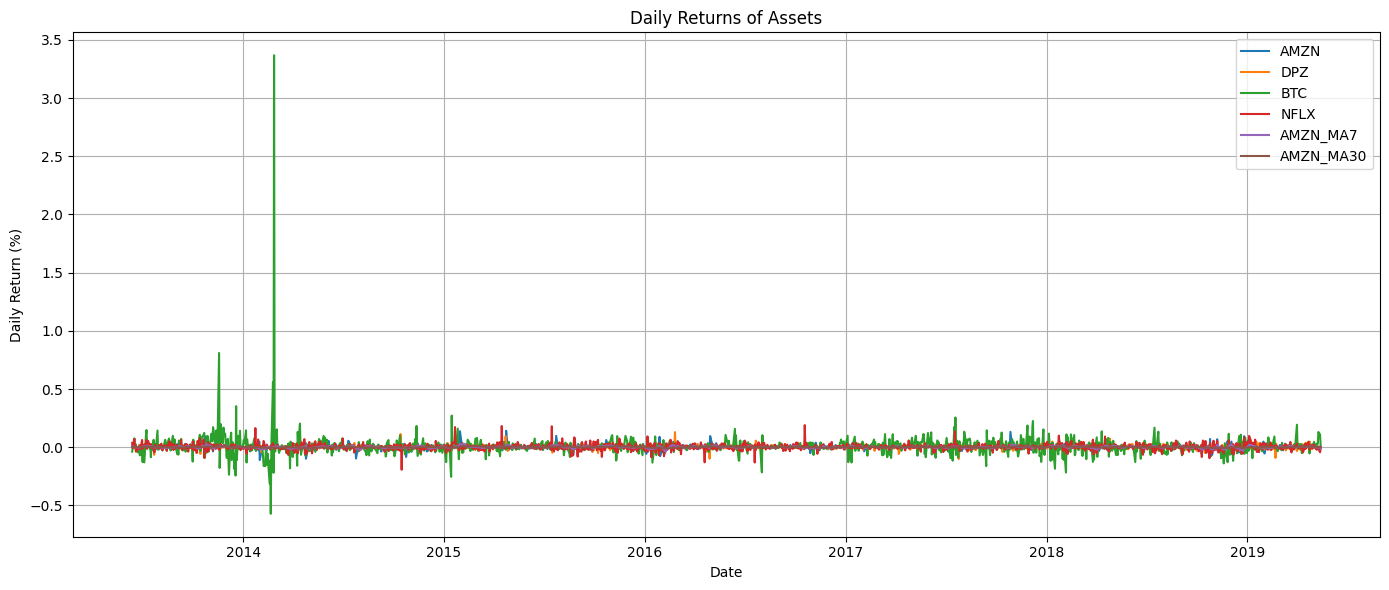

In [4]:
# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Plot daily returns for all assets
plt.figure(figsize=(14, 6))
for column in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[column], label=column)

plt.title("Daily Returns of Assets")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

* This chart shows ***daily return percentages*** for AMZN, DPZ, BTC, and NFLX.

* ***Bitcoin (BTC)*** exhibits the ***highest volatility***, with sharp spikes and dips (especially visible around 2014), indicating high risk and potential high reward.

* Stocks like ***AMZN***, ***DPZ***, and ***NFLX*** have ***smaller***, ***more stable fluctuations***, reflecting ***lower volatility*** and more predictable behavior.

* The ***moving average lines (AMZN_MA7, MA30)*** are relatively flat, showing that Amazon’s short- and long-term average returns are stable over time.

* ***Extreme spikes***, especially in BTC, could be due to ***market news***, ***hype cycles***, or ***regulatory events***.

# **Step 3: Feature Selection – Technical Indicators**

**📌 1. RSI (Relative Strength Index)**

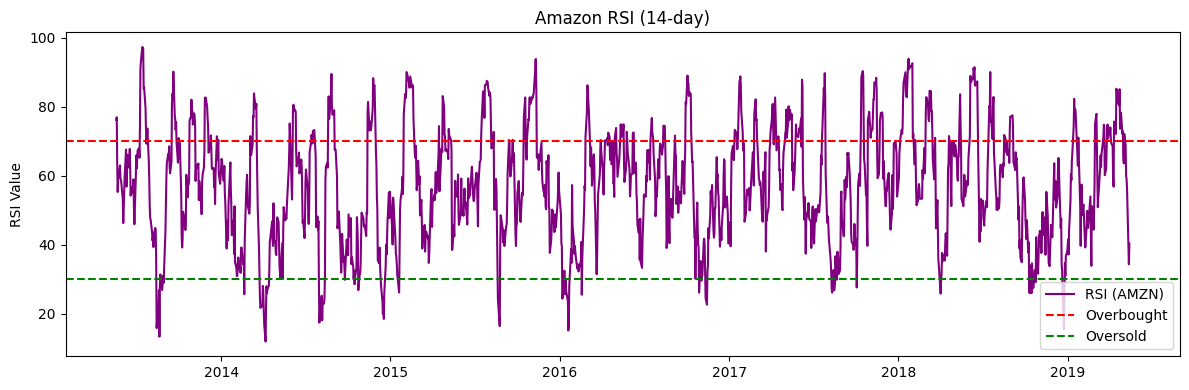

In [5]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for Amazon (AMZN)
df['AMZN_RSI'] = calculate_rsi(df['AMZN'])

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['AMZN_RSI'], label='RSI (AMZN)', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title("Amazon RSI (14-day)")
plt.ylabel("RSI Value")
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation:-**

* The ***RSI oscillates between 0 and 100*** to show momentum.

* **Above 70 (red dashed line)** → ***Overbought:*** Indicates potential ***downturns or corrections***.

* **Below 30 (green dashed line)** → ***Oversold:*** Indicates potential ***buying opportunities or rebounds***.

* Amazon's RSI regularly enters both zones, showing it experiences ***frequent short-term price swings***.

* The frequent returns to the 30–70 range suggest ***healthy, active market behavior*** without prolonged extremes.

**📌 2. MACD (Moving Average Convergence Divergence)**

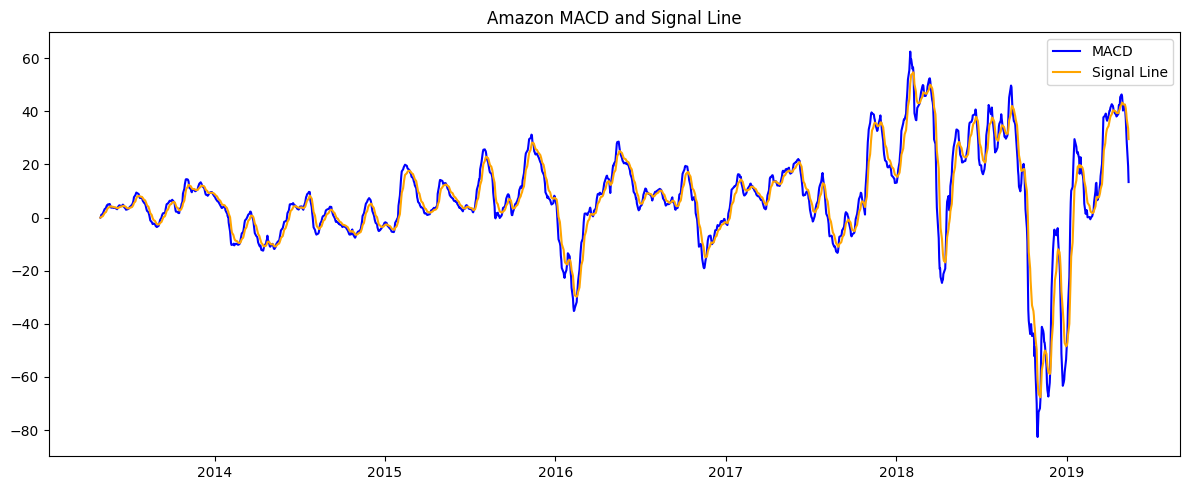

In [6]:
# Calculate MACD and Signal Line for Amazon
ema_12 = df['AMZN'].ewm(span=12, adjust=False).mean()
ema_26 = df['AMZN'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='orange')
plt.title("Amazon MACD and Signal Line")
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation:-**

* ***MACD Line (blue)*** crossing ***above*** the ***Signal Line (orange)*** → ***Bullish signal*** (potential buy).

* ***MACD Line crossing below*** the Signal Line → ***Bearish signal*** (potential sell).

* ***Larger distance*** between MACD and Signal Line → ***Stronger momentum***.

* Around ***2018–2019***, MACD shows strong ***volatility and momentum shifts***, aligning with large price movements seen in earlier plots.

* Repeated crossovers indicate ***frequent short-term trading opportunities*** and ***trend reversals***.

# **Step 4: Conclusion**

**📊 Summary of Insights:-**

1. ***📈 Trend Analysis:***
   * Amazon, Domino’s, Netflix, and Bitcoin show distinct long-term growth trajectories.
   * Bitcoin exhibited higher volatility compared to traditional stocks.


2. ***🔄 Volatility & Returns:***

   * Daily returns show sharp fluctuations, especially for BTC.
   * Stocks like Domino’s (DPZ) exhibited steadier trends and more moderate volatility.

3. ***📉 Technical Indicators:***

      * **RSI** highlighted potential overbought/oversold zones — useful for timing entry/exit points.
      * **MACD** and **Signal Line** identified trend reversals and momentum shifts for Amazon.

**📌 Investment Implications:-**

* Moving averages help filter out noise and understand trend direction.

* RSI and MACD can guide **short-term trading** decisions.

* Long-term investors may prioritize trend consistency and risk levels over short-term volatility.